In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score

# Pre-processing

In [4]:
df_train_original = pd.read_csv('train.csv')
df_train = df_train_original.copy()
df_train.head()

C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16320\4136590211.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_original = pd.read_csv('train.csv')


,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
#Check Data Size
print('Train Data Size : ',df_train.shape)

Train Data Size :  (100000, 29)


In [4]:
df_train.columns

Index(['Unnamed: 0', 'ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN',
       'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
#Check Train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                100000 non-null  int64  
 1   ID                        100000 non-null  object 
 2   Customer_ID               100000 non-null  object 
 3   Month                     100000 non-null  object 
 4   Name                      90015 non-null   object 
 5   Age                       100000 non-null  object 
 6   SSN                       100000 non-null  object 
 7   Occupation                100000 non-null  object 
 8   Annual_Income             100000 non-null  object 
 9   Monthly_Inhand_Salary     84998 non-null   float64
 10  Num_Bank_Accounts         100000 non-null  int64  
 11  Num_Credit_Card           100000 non-null  int64  
 12  Interest_Rate             100000 non-null  int64  
 13  Num_of_Loan               100000 non-null  ob

In [6]:
df_train['Credit_Score'].unique()

array(['Good', 'Poor'], dtype=object)

In [7]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100000.0,49999.500000,28867.657797,0.000000,24999.750000,49999.500000,74999.250000,99999.000000
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [8]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [9]:
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [10]:
# mode because the values can take values of int and string
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:", df[column].isnull().sum())

    # Attempt to fill with local mode, handling cases where the mode is not found
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)
    
    # Optional: you can decide to fill remaining NaNs with a global mode or another specific value
    # global_mode = df[column].mode().iat[0] if not df[column].mode().empty else np.nan
    # mode_per_group.fillna(global_mode, inplace=True)

    df[column] = df[column].fillna(mode_per_group)

def fill_missing_with_group_mean(df, groupby, column):
    print("\nNo. of missing values before filling with group mean:", df[column].isnull().sum())

    # Fill with local mean
    mean_per_group = df.groupby(groupby)[column].transform('mean')
    df[column] = df[column].fillna(mean_per_group)

    print("\nNo. of missing values after filling with group mean:", df[column].isnull().sum())


In [11]:
#Method to clean categorical field

def clean_categorical_field(df,groupby,column,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")

    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    #For each Customer_ID, assign same value for the column

    # changed here : gsig1846
    fill_missing_with_group_mode(df,groupby,column)

In [12]:
# Handle Outliers and null values
def fix_inconsistent_values(df, groupby, column):
    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')

    df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
    mini, maxi = x.mode, y.mode

    # assign Wrong Values to NaN
    col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)|(x<0)) else x)

    # fill with local mode
    mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df[column] = col.fillna(mode_by_group)

    # # fillinf the remaining vsalues with mean
    # df[column].fillna(df[column].mean(),inplace=True)

    # fill remaining null values with median
    df[column].fillna(df[column].median(), inplace=True)

    # # fill remaining null values with random values
    # df[column].fillna(np.random.choice(df[column].dropna()), inplace=True)


    # fill remaining null values using linear interpolation
    df[column].interpolate(method='linear', inplace=True)

    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
    print("\nNo. of Unique values after Cleaning:",df[column].nunique())
    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())

In [13]:
#Method to clean Numerical Field
def clean_numerical_field(df,groupby,column,strip=None,datatype=None,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")

    #Replace with np.nan
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")

    # Remove trailing & leading special characters
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")

    # Change datatype
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    fix_inconsistent_values(df, groupby, column)

In [14]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
# plot_countplot(df_train,column_name,user_friendly_name)

Details of Credit_Score column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

Credit_Score
Good    71002
Poor    28998
Name: count, dtype: int64


In [15]:
df_train

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Good


In [16]:
#Get Details
get_column_details(df_train,'ID')

Details of ID column

DataType:  object

There are no null values

Number of Unique Values:  100000

Distribution of column:

ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64


In [17]:
#Get Details
get_column_details(df_train,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  12500

Distribution of column:

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64


In [18]:
#Check if same customer can have different credit score
df_train.groupby(['Customer_ID'])['Credit_Score'].nunique()

Customer_ID
CUS_0x1000    2
CUS_0x1009    1
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    1
             ..
CUS_0xff3     1
CUS_0xff4     1
CUS_0xff6     1
CUS_0xffc     2
CUS_0xffd     1
Name: Credit_Score, Length: 12500, dtype: int64

In [19]:
column_name = 'Month'

#Get Details
get_column_details(df_train,column_name)


Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


In [20]:
print(df_train['Month'])
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month
# df_train['Month'] = df_train['Month'].astype(int)
print(df_train['Month'])

0         January
1        February
2           March
3           April
4             May
           ...   
99995       April
99996         May
99997        June
99998        July
99999      August
Name: Month, Length: 100000, dtype: object
0        1
1        2
2        3
3        4
4        5
        ..
99995    4
99996    5
99997    6
99998    7
99999    8
Name: Month, Length: 100000, dtype: int32


In [21]:
column_name = 'Name'
group_by = 'Customer_ID'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name)

Details of Name column

DataType:  object

There are  9985  null values

Number of Unique Values:  10139

Distribution of column:

Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64

-----------------------------------------------------

Cleaning steps 

No. of missing values before filling with group mode: 9985


In [22]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of SSN column

DataType:  object

There are no null values

Number of Unique Values:  12501

Distribution of column:

SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value #F%$D@*&8 is replaced with np.nan

No. of missing values before filling with group mode: 5572


In [23]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
# plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 7062


In [24]:
#Get Details of Type of Loan column
get_column_details(df_train,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  11408  null values

Number of Unique Values:  6260

Distribution of column:

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified,

In [25]:
#Handle Type of Loan null values
df_train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\1940027675.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)


In [26]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
# plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

No. of missing values before filling with group mode: 20195


In [27]:
column_name = 'Payment_of_Min_Amount'

#Get Details
get_column_details(df_train,column_name)

#Plot Distribution with Credit_Score
# plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


In [28]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
# plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=80)

Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 7600


In [29]:
column_name = 'Annual_Income'
group_by = 'Customer_ID'
user_friendly_name = 'Annual Income'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Annual_Income column

DataType:  object

There are no null values

Number of Unique Values:  18940

Distribution of column:

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: count, Length: 18940, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Annual_Income is changed to float

Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

After Cleaning Min, Max Values:
min      7005.93
max    179987.28
Name: Annual_Income, dtype: float64

No. of Unique values after Cleaning: 12488

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [30]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Monthly_Inhand_Salary column

DataType:  float64

There are  15002  null values

Number of Unique Values:  13235

Distribution of column:

Monthly_Inhand_Salary
6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: count, Length: 13235, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

After Cleaning Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

No. of Unique values after Cleaning: 13235

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [31]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
# plot_countplot(df_train,column_name,user_friendly_name)

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  943

Distribution of column:

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min      -1
max    1798
Name: Num_Bank_Accounts, dtype: int64

After Cleaning Min, Max Values:
min    -1.0
max    10.0
Name: Num_Bank_Accounts, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [32]:

column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
# plot_countplot(df_train,column_name,user_friendly_name)

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  1179

Distribution of column:

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0
max    1499
Name: Num_Credit_Card, dtype: int64

After Cleaning Min, Max Values:
min     0.0
max    11.0
Name: Num_Credit_Card, dtype: float64

No. of Unique values after Cleaning: 12

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [33]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
# plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  1750

Distribution of column:

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       1
max    5797
Name: Interest_Rate, dtype: int64

After Cleaning Min, Max Values:
min     1.0
max    34.0
Name: Interest_Rate, dtype: float64

No. of Unique values after Cleaning: 34

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [34]:

column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'
user_friendly_name = 'Delay from Due Date'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min    -5
max    67
Name: Delay_from_due_date, dtype: int64

After Cleaning Min, Max Values:
min    -5.0
max    62.0
Name: Delay_from_due_date, dtype: float64

No. of Unique values after Cleaning: 68

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [35]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Delayed Payment'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float')

#Plot Graph
# plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_of_Delayed_Payment column

DataType:  object

There are  7002  null values

Number of Unique Values:  749

Distribution of column:

Num_of_Delayed_Payment
19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: count, Length: 749, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Delayed_Payment is changed to float

Existing Min, Max Values:
min      -3.0
max    4397.0
Name: Num_of_Delayed_Payment, dtype: float64

After Cleaning Min, Max Values:
min    -2.0
max    28.0
Name: Num_of_Delayed_Payment, dtype: float64

No. of Unique values after Cleaning: 31

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [36]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'
user_friendly_name = 'Changed Credit Limit'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='float',replace_value='_')

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  4384

Distribution of column:

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Changed_Credit_Limit is changed to float

Existing Min, Max Values:
min    -6.49
max    36.97
Name: Changed_Credit_Limit, dtype: float64

After Cleaning Min, Max Values:
min    -5.01
max    29.98
Name: Changed_Credit_Limit, dtype: float64

No. of Unique values after Cleaning: 3532

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [37]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Inquiries'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
# plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_Credit_Inquiries column

DataType:  float64

There are  1965  null values

Number of Unique Values:  1223

Distribution of column:

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: count, Length: 1223, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min       0.0
max    2597.0
Name: Num_Credit_Inquiries, dtype: float64

After Cleaning Min, Max Values:
min     0.0
max    17.0
Name: Num_Credit_Inquiries, dtype: float64

No. of Unique values after Cleaning: 18

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [38]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'
user_friendly_name = 'Outstanding Debt'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  13178

Distribution of column:

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Outstanding_Debt is changed to <class 'float'>

Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

After Cleaning Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

No. of Unique values after Cleaning: 12203

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [39]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'
user_friendly_name = 'Credit Utilization Ratio'

#Get Details
get_column_details(df_train,column_name)

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name)

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  100000

Distribution of column:

Credit_Utilization_Ratio
26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: count, Length: 100000, dtype: int64


In [40]:
df_train['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [41]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

In [42]:
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'
user_friendly_name = 'Credit History Age'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,datatype=float)

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name)

Details of Credit_History_Age column

DataType:  float64

There are  9030  null values

Number of Unique Values:  404

Distribution of column:

Credit_History_Age
191.0    446
232.0    445
233.0    444
215.0    443
231.0    441
        ... 
3.0       20
2.0       15
403.0     14
404.0     12
1.0        2
Name: count, Length: 404, dtype: int64

-----------------------------------------------------

Cleaning steps 

Datatype of Credit_History_Age is changed to <class 'float'>

Existing Min, Max Values:
min      1.0
max    404.0
Name: Credit_History_Age, dtype: float64

After Cleaning Min, Max Values:
min      1.0
max    397.0
Name: Credit_History_Age, dtype: float64

No. of Unique values after Cleaning: 397

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [43]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'
user_friendly_name = 'Total EMI per month'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name)

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name)

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  14950

Distribution of column:

Total_EMI_per_month
0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: count, Length: 14950, dtype: int64

-----------------------------------------------------

Cleaning steps 

Existing Min, Max Values:
min        0.0
max    82331.0
Name: Total_EMI_per_month, dtype: float64

After Cleaning Min, Max Values:
min       0.000000
max    1779.103254
Name: Total_EMI_per_month, dtype: float64

No. of Unique values after Cleaning: 11890

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [44]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'
user_friendly_name = 'Amount invested monthly'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,datatype=float,strip='_')

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name,bins=100)

Details of Amount_invested_monthly column

DataType:  object

There are  4479  null values

Number of Unique Values:  91049

Distribution of column:

Amount_invested_monthly
__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: count, Length: 91049, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Amount_invested_monthly is changed to <class 'float'>

Existing Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

After Cleaning Min, Max Values:
min        0.0
max    10000.0
Name: Amount_invested_monthly, dtype: float64

No. of Unique values after Cleaning: 91049

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [45]:
column_name = 'Monthly_Balance'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Balance'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
df_train[column_name].replace('',np.nan)
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float,replace_value='__-333333333333333333333333333__')

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name,bins=30)

Details of Monthly_Balance column

DataType:  object

There are  1200  null values

Number of Unique Values:  98792

Distribution of column:

Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.673696                          1
Name: count, Length: 98792, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value __-333333333333333333333333333__ is replaced with np.nan

Trailing & leading _ are removed

Datatype of Monthly_Balance is changed to <class 'float'>

Existing Min, Max Values:
min       0.007760
max    1602.040519
Name: Monthly_Balance, dtype: float64

After Cleaning Min, Max Values:
min       

C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [46]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Loan'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype=float)

#Plot Graph
# plot_displot(df_train,column_name,user_friendly_name,bins=30)

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  434

Distribution of column:

Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Num_of_Loan is changed to <class 'float'>

Existing Min, Max Values:
min    -100.0
max    1496.0
Name: Num_of_Loan, dtype: float64

After Cleaning Min, Max Values:
min    0.0
max    9.0
Name: Num_of_Loan, dtype: float64

No. of Unique values after Cleaning: 10

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [47]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'


#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_numerical_field(df_train,group_by,column_name,strip='_',datatype='int')

Details of Age column

DataType:  object

There are no null values

Number of Unique Values:  1788

Distribution of column:

Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64

-----------------------------------------------------

Cleaning steps 

Trailing & leading _ are removed

Datatype of Age is changed to int

Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

After Cleaning Min, Max Values:
min    14.0
max    56.0
Name: Age, dtype: float64

No. of Unique values after Cleaning: 43

No. of Null values after Cleaning: 0


C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\aditya.singh1\AppData\Local\Temp\ipykernel_16312\597402812.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [48]:
#Check if null values are present
df_train.isna().sum()

Unnamed: 0                  0
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [59]:
#Drop columns
print("Size of Dataset before dropping columns : ",df_train.shape)
drop_columns = ['Unnamed: 0','ID','Customer_ID','Name','SSN']
df_train.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_train.shape)

Size of Dataset before dropping columns :  (100000, 25)
Size of Dataset after dropping columns :  (100000, 24)


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'
                       ,'Credit_Score'
                       ]
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])


## Pre Processed Data for Training 

In [2]:
df_train = pd.read_csv("train_prep.csv")

In [3]:
drop_columns = ['Unnamed: 0.1', 'Unnamed: 0']
df_train.drop(drop_columns,axis=1,inplace=True)

In [4]:
df_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df_train.head(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,265.0,1,49.574949,118.280222,3,284.629162,0
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
5,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,27.262259,270.0,1,49.574949,62.430172,1,340.479212,0
6,7,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,22.537593,271.0,1,49.574949,178.344067,5,244.565317,0
7,8,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,23.933795,265.0,1,49.574949,24.785217,1,358.124168,0
8,1,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,684,...,1,605.03,24.464031,319.0,1,18.816215,104.291825,5,470.690627,0
9,2,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,684,...,1,605.03,38.550848,320.0,1,18.816215,40.391238,0,484.591214,0


In [5]:
#Split Input & Output Data
X = df_train.drop('Credit_Score',axis=1)
y = df_train['Credit_Score']
print(X.shape)
print(y.shape)

(100000, 23)
(100000,)


In [7]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Approach 1

In [6]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 23)
(20000, 23)
(80000,)
(20000,)


In [7]:
# #Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

Model Selection : on Minority Class precision

In [11]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [73]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on testing set
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        precision = precision_score(y_test, y_pred, pos_label=1)  # assuming '1' is the minority class
        results[name] = precision
        print(f'{name} Precision: {precision:.4f}')
        
    return results

In [74]:
results = train_and_evaluate(models, X_train, y_train, X_test, y_test)

Logistic Regression Precision: 0.7898
Random Forest Precision: 0.9085
Support Vector Machine Precision: 0.8035


C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [10:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Precision: 0.9034


Random Forest Classifier Cross Validation : **90.85**
XGBoost classifier Cross Validation : **90.34**

In [76]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the precision scorer for the minority class
precision_scorer = make_scorer(precision_score, pos_label=1)

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring=precision_scorer)
print("Random Forest Cross-Validation Precision Scores:", rf_cv_scores)
print("Mean Precision for Random Forest:", rf_cv_scores.mean())

# Perform cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgboost_classifier, X, y, cv=5, scoring=precision_scorer)
print("XGBoost Cross-Validation Precision Scores:", xgb_cv_scores)
print("Mean Precision for XGBoost:", xgb_cv_scores.mean())

Random Forest Cross-Validation Precision Scores: [0.72374191 0.74573055 0.72663415 0.72851406 0.75223499]
Mean Precision for Random Forest: 0.7353711310011404


C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:00:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:00:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:00:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used

XGBoost Cross-Validation Precision Scores: [0.69705146 0.71459609 0.70764673 0.71116226 0.72982666]
Mean Precision for XGBoost: 0.7120566381051505


Recall of Minority class | Precision of Majortiy Class

In [12]:
recall_scorer_minority = make_scorer(recall_score, pos_label=1)
precision_scorer_majority = make_scorer(precision_score, pos_label=0)

In [13]:
# Function to perform cross-validation and calculate metrics
def evaluate_models(models, X, y):
    for name, model in models.items():
        recall_cv_scores = cross_val_score(model, X, y, cv=5, scoring=recall_scorer_minority)
        precision_cv_scores = cross_val_score(model, X, y, cv=5, scoring=precision_scorer_majority)
        
        print(f"{name} Recall (Minority class): {recall_cv_scores.mean():.4f} (+/- {recall_cv_scores.std():.4f})")
        print(f"{name} Precision (Majority class): {precision_cv_scores.mean():.4f} (+/- {precision_cv_scores.std():.4f})")

In [14]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [15]:
# Dictionary of models to evaluate
models = {
    'Random Forest': random_forest,
    'XGBoost': xgboost_classifier
}

# Evaluate the models
evaluate_models(models, X, y)

Random Forest Recall (Minority class): 0.6169 (+/- 0.0154)
Random Forest Precision (Majority class): 0.8532 (+/- 0.0046)


C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [17:50:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [17:50:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [17:50:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used

XGBoost Recall (Minority class): 0.6355 (+/- 0.0131)
XGBoost Precision (Majority class): 0.8574 (+/- 0.0041)


**Variable Selection for training**

Using correlation matrix 

In [18]:
correlation_matrix = df_train.corr(method='pearson').abs() 

# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)


Pearson Correlation Matrix:
                                 Month       Age    Occupation  Annual_Income  \
Month                     1.000000e+00  0.017003  2.048899e-16   1.530483e-17   
Age                       1.700298e-02  1.000000  3.945204e-03   9.151940e-02   
Occupation                2.048899e-16  0.003945  1.000000e+00   1.270171e-03   
Annual_Income             1.530483e-17  0.091519  1.270171e-03   1.000000e+00   
Monthly_Inhand_Salary     1.823499e-03  0.090550  6.875093e-04   9.981890e-01   
Num_Bank_Accounts         2.355877e-05  0.190436  1.044610e-02   2.840836e-01   
Num_Credit_Card           9.289842e-05  0.148551  3.455146e-03   2.178539e-01   
Interest_Rate             6.790115e-18  0.217531  4.501347e-03   3.023524e-01   
Num_of_Loan               1.555542e-16  0.213500  5.037742e-03   2.555596e-01   
Type_of_Loan              9.398660e-17  0.010067  7.010616e-03   1.821045e-02   
Delay_from_due_date       3.447420e-04  0.174097  7.280696e-03   2.501095e-01   


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(50, 40))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Pearson Correlation Matrix')
plt.show()

: 

In [26]:
# Calculate variances of each column
variances = df_train.var()

# Iterate over the lower triangle of the correlation matrix
to_drop = set()  # To keep track of columns to drop
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.5:  # If correlation is greater than 0.6
            # Identify the feature with the lesser variance
            if variances[correlation_matrix.columns[i]] > variances[correlation_matrix.columns[j]]:
                to_drop.add(correlation_matrix.columns[j])
            else:
                to_drop.add(correlation_matrix.columns[i])

In [ ]:
to_drop

{'Credit_History_Age',
 'Credit_Mix',
 'Delay_from_due_date',
 'Interest_Rate',
 'Monthly_Balance',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Inquiries',
 'Num_of_Delayed_Payment',
 'Num_of_Loan',
 'Payment_Behaviour'}

Using Drop features for getting the deciding scores

In [9]:
# Define the precision and recall scorers
precision_scorer_minority = make_scorer(precision_score, pos_label=1)
precision_scorer_majority = make_scorer(precision_score, pos_label=0)
recall_scorer_minority = make_scorer(recall_score, pos_label=1)

In [10]:
# Define thresholds to test
thresholds = np.arange(0.5, 0.95, 0.05)

# Prepare to store results
results = []

In [11]:
# Loop through each threshold

for thresh in thresholds:
    # Calculate the correlation matrix and get absolute values
    correlation_matrix = X.corr().abs()
    
    # Determine features to drop based on correlation threshold and variance
    to_drop = set()
    variances = X.var()
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if correlation_matrix.iloc[i, j] > thresh:
                if variances[correlation_matrix.columns[i]] > variances[correlation_matrix.columns[j]]:
                    to_drop.add(correlation_matrix.columns[j])
                else:
                    to_drop.add(correlation_matrix.columns[i])
    
    # Drop the features with less variance that exceed the correlation threshold
    X_reduced = X.drop(columns=to_drop)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)
    
    # Initialize classifiers
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    }
    
    # Evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate scores
        precision_minority = precision_score(y_test, y_pred, pos_label=1)
        precision_majority = precision_score(y_test, y_pred, pos_label=0)
        recall_minority = recall_score(y_test, y_pred, pos_label=1)
        
        # Store results
        results.append({
            'Model': name,
            'Threshold': thresh,
            'Precision Minority Class': precision_minority,
            'Precision Majority Class': precision_majority,
            'Recall Minority Class': recall_minority,
            'Features Dropped': list(to_drop)
        })

C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:04:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:04:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [12:05:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used

In [12]:
# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

            Model  Threshold  Precision Minority Class  \
0   Random Forest       0.50                  0.802242   
1         XGBoost       0.50                  0.760995   
2   Random Forest       0.55                  0.794173   
3         XGBoost       0.55                  0.762024   
4   Random Forest       0.60                  0.805541   
5         XGBoost       0.60                  0.764834   
6   Random Forest       0.65                  0.815091   
7         XGBoost       0.65                  0.781937   
8   Random Forest       0.70                  0.815091   
9         XGBoost       0.70                  0.781937   
10  Random Forest       0.75                  0.815091   
11        XGBoost       0.75                  0.781937   
12  Random Forest       0.80                  0.815091   
13        XGBoost       0.80                  0.781937   
14  Random Forest       0.85                  0.815091   
15        XGBoost       0.85                  0.781937   
16  Random For

In [13]:
results_df.to_csv('model_performance_across_thresholds.csv', index=False)

Testing by dropping features for thresh hold 0.6 - 0.7

**RF Classifier Feature Importances**

In [10]:
# Train RandomForest

features_of_interest =['Credit_History_Age', 'Interest_Rate', 'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Bank_Accounts']


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).filter(items=features_of_interest)

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X, y)
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).filter(items=features_of_interest)

# Compare importances
importances_df = pd.DataFrame({'RF': rf_importances, 'XGB': xgb_importances})
print(importances_df.sort_values(by='XGB', ascending=False))

C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:28:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


                             RF       XGB
Interest_Rate          0.084846  0.092838
Num_Bank_Accounts      0.031758  0.028387
Num_Credit_Inquiries   0.059432  0.023632
Num_of_Loan            0.029935  0.023154
Monthly_Inhand_Salary  0.037173  0.022836
Credit_History_Age     0.064382  0.020993
Monthly_Balance        0.038921  0.012165


Dropping columns and testing

In [30]:
# Function to read data, preprocess, and drop specified columns
def prepare_data(drop_columns):
    # Load your dataset
    data = pd.read_csv('train_prep.csv')
    X = data.drop('Credit_Score', axis=1)  # Assuming 'target_column' is your actual target column name
    y = data['Credit_Score']
    # Drop specified columns
    X = X.drop(columns=drop_columns)
    
    return X, y

In [37]:
def evaluate_models(X, y):
    # Split data into training and testing sets
    
    rf_best_params = {
    'bootstrap': True,
    'max_depth': 38,
    'max_features': 'log2',
    'max_samples': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 278
    }
    
    xgb_best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.08,
    'max_depth': 14,
    'min_child_weight': 1,
    'n_estimators': 400,
    'subsample': 0.75
    }
    
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Initialize classifiers
    models = {
        'Random Forest': RandomForestClassifier(
                                                n_estimators=rf_best_params['n_estimators'],
                                                min_samples_split=rf_best_params['min_samples_split'],
                                                min_samples_leaf=rf_best_params['min_samples_leaf'],
                                                max_samples=rf_best_params['max_samples'],
                                                max_features=rf_best_params['max_features'],
                                                bootstrap=rf_best_params['bootstrap'],
                                                max_depth=rf_best_params['max_depth']
                                                ),
        'XGBoost': XGBClassifier( colsample_bytree=xgb_best_params['colsample_bytree'],
                                    learning_rate=xgb_best_params['learning_rate'],
                                    max_depth=xgb_best_params['max_depth'],
                                    min_child_weight=xgb_best_params['min_child_weight'],
                                    n_estimators=xgb_best_params['n_estimators'], 
                                    subsample=xgb_best_params['subsample']
                                    )
    }
    
    # Dictionary to store results
    results = {}
    
    # Evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        print(f"------{name} Model Metrics---------\n")
        print(evaluate_model(y_test, y_pred))
        print(f"------{name} Confusion Metrics---------\n")
        print(confusion_matrix(y_test,y_pred))
        
        # Calculate scores
        precision_minority = precision_score(y_test, y_pred, pos_label=1)
        precision_majority = precision_score(y_test, y_pred, pos_label=0)
        recall_minority = recall_score(y_test, y_pred, pos_label=1)
        
        # Store results
        results[name] = {
            'Precision Minority Class': precision_minority,
            'Precision Majority Class': precision_majority,
            'Recall Minority Class': recall_minority
        }
    
    return results

In [24]:
drop_columns = [ 'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Num_Bank_Accounts'] # Replace with the actual column names you want to drop
X_test, y_test = prepare_data(drop_columns)
model_scores = evaluate_models(X_test, y_test)
result_df = pd.DataFrame(model_scores)  
result_df


C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [19:36:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Random Forest,XGBoost
Precision Minority Class,0.809185,0.777559
Precision Majority Class,0.927300,0.899042
Recall Minority Class,0.823276,0.749138


Dropping the Following Columns : **'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Num_Bank_Accounts'**

In [8]:
final_drop_columns =  [ 'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Payment_Behaviour']
X = X.drop(final_drop_columns,axis=1)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 18)
(20000, 18)
(80000,)
(20000,)


**Feature Importances Graphical Representation**

In [13]:
import matplotlib.pyplot as plt
import os


In [11]:
features = list(X.columns)

In [12]:
rf_best_params = {
    'bootstrap': True,
    'max_depth': 38,
    'max_features': 'log2',
    'max_samples': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 278
}

rf_model = RandomForestClassifier(
    n_estimators=rf_best_params['n_estimators'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf'],
    max_samples=rf_best_params['max_samples'],
    max_features=rf_best_params['max_features'],
    bootstrap=rf_best_params['bootstrap'],
    max_depth=rf_best_params['max_depth']
)
rf_model.fit(X_train, y_train)

# XGBoost parameters and model fitting
xgb_best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.08,
    'max_depth': 14,
    'min_child_weight': 1,
    'n_estimators': 400,
    'subsample': 0.75
}

xgb_model = XGBClassifier(
    colsample_bytree=xgb_best_params['colsample_bytree'],
    learning_rate=xgb_best_params['learning_rate'],
    max_depth=xgb_best_params['max_depth'],
    min_child_weight=xgb_best_params['min_child_weight'],
    n_estimators=xgb_best_params['n_estimators'], 
    subsample=xgb_best_params['subsample']
)
xgb_model.fit(X_train, y_train)  # Ensure this fit method is called

# Get feature importances from both models
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features,
    'RandomForest': rf_importances,
    'XGBoost': xgb_importances
})




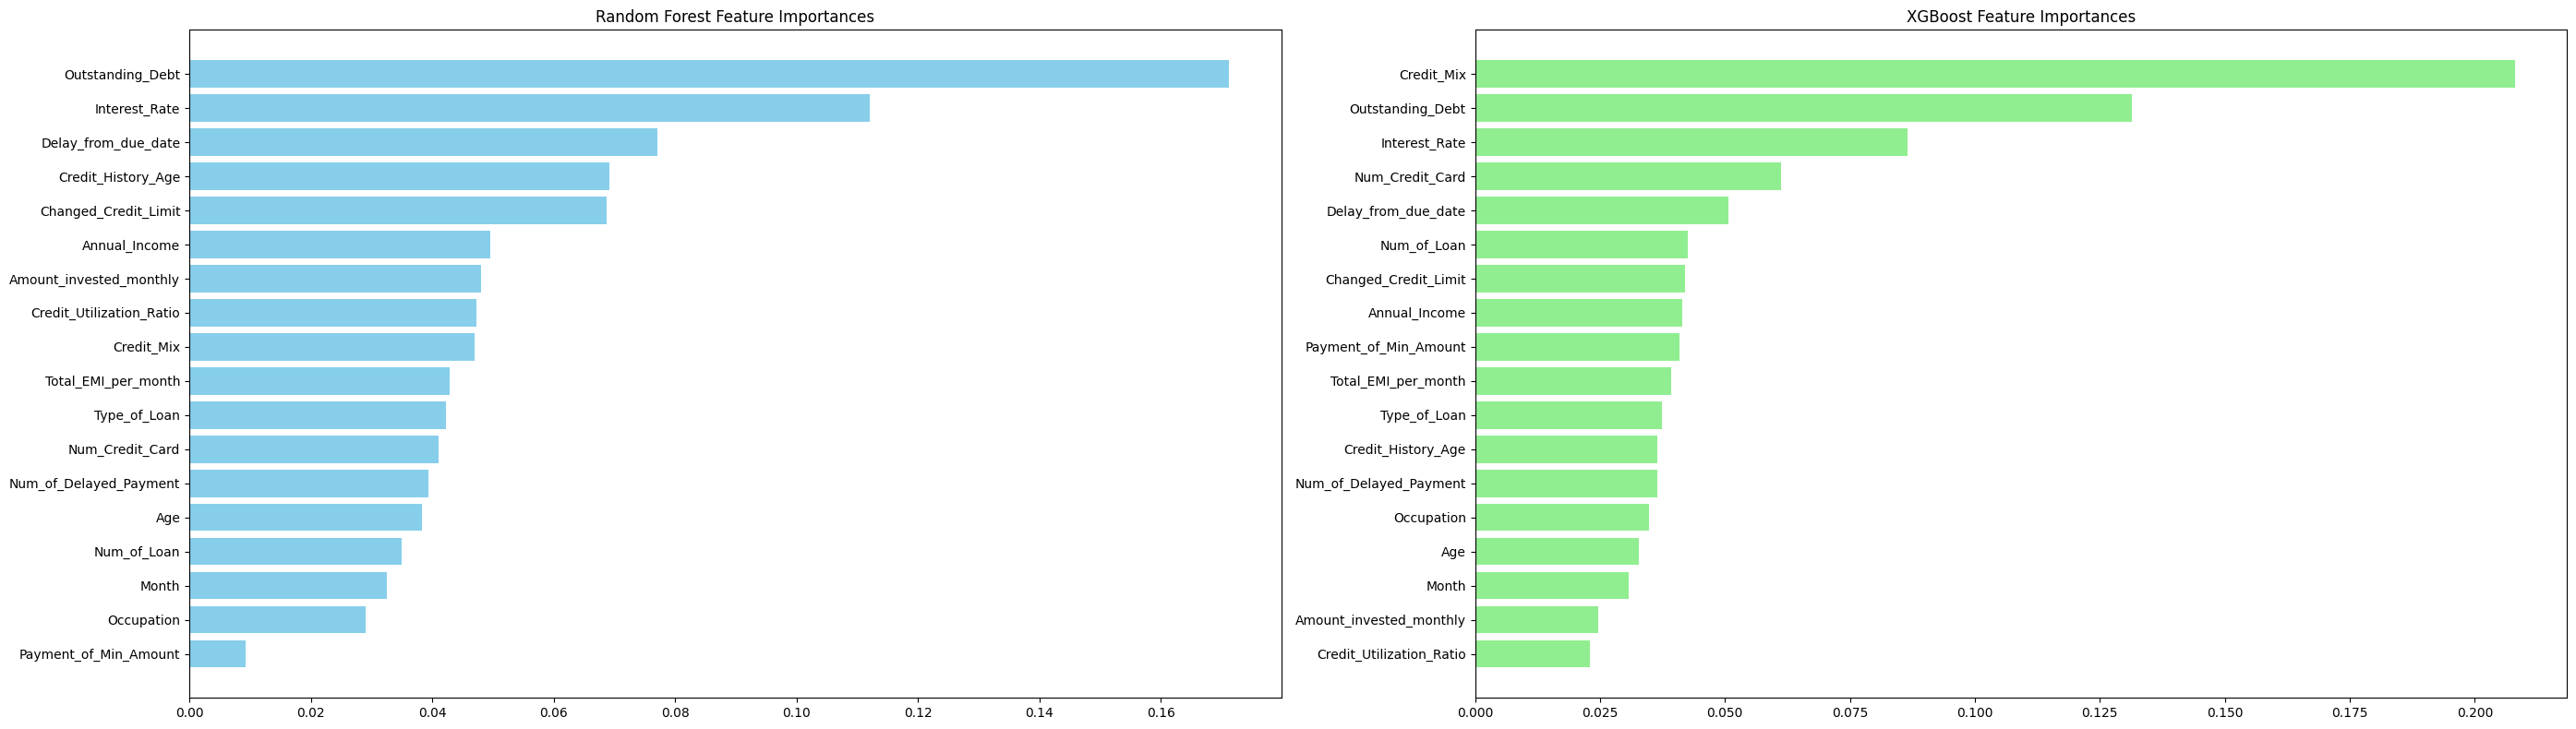

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(28, 8))

# Random Forest Feature Importances, sorted
importance_df_sorted_rf = importance_df.sort_values(by='RandomForest', ascending=True)
axes[0].barh(importance_df_sorted_rf['Feature'], importance_df_sorted_rf['RandomForest'], color='skyblue')
axes[0].set_title('Random Forest Feature Importances')

# XGBoost Feature Importances, sorted
importance_df_sorted_xgb = importance_df.sort_values(by='XGBoost', ascending=True)
axes[1].barh(importance_df_sorted_xgb['Feature'], importance_df_sorted_xgb['XGBoost'], color='lightgreen')
axes[1].set_title('XGBoost Feature Importances')


folder_path = 'plots'

# Save the figure
file_path = os.path.join(folder_path, 'xgboost_random_forst_feature_importance.png')
plt.savefig(file_path, format='png', dpi=450)  # dpi can be adjusted for higher resolution


plt.tight_layout()
plt.show()

**Point_Biserialr_Correlation for getting correlation of 'Credit_Score' with rest of the features**

In [21]:
from scipy.stats import pointbiserialr

In [25]:
# Calculate Point Biserial correlation for each feature
feature_importances = {column: pointbiserialr(df_train[column], y)[0] for column in X.columns}

# Display feature importances
importance_df = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'PointBiserial_Correlation'])
importance_df = importance_df.sort_values(by='PointBiserial_Correlation', ascending=False)
print(importance_df)


                     Feature  PointBiserial_Correlation
5              Interest_Rate                   0.413436
8        Delay_from_due_date                   0.373286
12          Outstanding_Debt                   0.362518
4            Num_Credit_Card                   0.337460
6                Num_of_Loan                   0.319454
9     Num_of_Delayed_Payment                   0.256445
15     Payment_of_Min_Amount                   0.174760
18         Payment_Behaviour                   0.103496
10      Changed_Credit_Limit                   0.062550
16       Total_EMI_per_month                   0.017625
2                 Occupation                   0.006354
0                      Month                   0.005232
17   Amount_invested_monthly                  -0.005814
7               Type_of_Loan                  -0.007568
13  Credit_Utilization_Ratio                  -0.037347
1                        Age                  -0.125938
3              Annual_Income                  -0

Eliminating features and checking accuracy

In [45]:
drop_columns = [ 'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Payment_Behaviour'] # Replace with the actual column names you want to drop # Delay_from_due_date > rf
X_test, y_test = prepare_data(drop_columns)                                                                                    # Payment_of_Min_Amount > both 
model_scores = evaluate_models(X_test, y_test)                                                                                 #  Payment_Behaviour > both >> best
result_df = pd.DataFrame(model_scores)                                                                                         
result_df


------Random Forest Model Metrics---------

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     14200
           1       0.82      0.85      0.83      5800

    accuracy                           0.90     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.90      0.90      0.90     20000

None
------Random Forest Confusion Metrics---------

[[13108  1092]
 [  895  4905]]
------XGBoost Model Metrics---------

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     14200
           1       0.81      0.83      0.82      5800

    accuracy                           0.90     20000
   macro avg       0.87      0.88      0.88     20000
weighted avg       0.90      0.90      0.90     20000

None
------XGBoost Confusion Metrics---------

[[13097  1103]
 [  966  4834]]


,Random Forest,XGBoost
Precision Minority Class,0.817909,0.814216
Precision Majority Class,0.936085,0.931309
Recall Minority Class,0.845690,0.833448


: 

Saving final results in output folder

In [23]:
def evaluate_model_and_save(drop_columns):
    # Load data
    df = pd.read_csv('train_prep.csv')  # Adjust path as necessary

    # Drop specified columns
    df = df.drop(columns=drop_columns)

    # Assuming 'target' is the name of your target column
    X = df.drop('Credit_Score', axis=1)
    y = df['Credit_Score']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    
    rf_best_params = {
    'bootstrap': True,
    'max_depth': 38,
    'max_features': 'log2',
    'max_samples': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 278
    }
    
    xgb_best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.08,
    'max_depth': 14,
    'min_child_weight': 1,
    'n_estimators': 400,
    'subsample': 0.75
    }

    

    # Initialize classifiers
    rf_model = RandomForestClassifier(
                                    n_estimators=rf_best_params['n_estimators'],
                                    min_samples_split=rf_best_params['min_samples_split'],
                                    min_samples_leaf=rf_best_params['min_samples_leaf'],
                                    max_samples=rf_best_params['max_samples'],
                                    max_features=rf_best_params['max_features'],
                                    bootstrap=rf_best_params['bootstrap'],
                                    max_depth=rf_best_params['max_depth']
                                    )

    
    xgb_model = XGBClassifier( 
                                colsample_bytree=xgb_best_params['colsample_bytree'],
                                learning_rate=xgb_best_params['learning_rate'],
                                max_depth=xgb_best_params['max_depth'],
                                min_child_weight=xgb_best_params['min_child_weight'],
                                n_estimators=xgb_best_params['n_estimators'], 
                                subsample=xgb_best_params['subsample']
                                )
    # Train the models
    rf_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)

    # Predictions
    rf_preds = rf_model.predict(X_test)
    xgb_preds = xgb_model.predict(X_test)

    # Evaluation
    metrics = {
        'Random Forest': {
            'Accuracy': accuracy_score(y_test, rf_preds),
            'Precision': precision_score(y_test, rf_preds, average=None),
            'Recall': recall_score(y_test, rf_preds, average=None)
        },
        'XGBoost': {
            'Accuracy': accuracy_score(y_test, xgb_preds),
            'Precision': precision_score(y_test, xgb_preds, average=None),
            'Recall': recall_score(y_test, xgb_preds, average=None)
        }
    }

   # Plotting
    fig, ax = plt.subplots(3, 1, figsize=(8, 12))
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall']
    for i, metric in enumerate(metrics_to_plot):
        if metric == 'Accuracy':
            bars = ax[i].bar(['Random Forest', 'XGBoost'],
                             [metrics['Random Forest'][metric], metrics['XGBoost'][metric]])
            ax[i].set_title(f'{metric}')
            ax[i].set_ylim(0, 1)
        else:
            class_labels = ['Poor', 'Good']
            bars = ax[i].bar([f'RF {label}' for label in class_labels] + [f'XGB {label}' for label in class_labels],
                             [metrics['Random Forest'][metric][0], metrics['Random Forest'][metric][1],
                              metrics['XGBoost'][metric][0], metrics['XGBoost'][metric][1]],
                             color=['red', 'green', 'red', 'green'])
            ax[i].set_title(f'{metric} by Class')
            ax[i].set_ylim(0, 1)
            ax[i].legend(bars, [f'RF {label}' for label in class_labels] + [f'XGB {label}' for label in class_labels])
        
        # Add annotations to the bars
        for bar in bars:
            yval = bar.get_height()
            ax[i].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment


    # Saving the plots to a folder
    folder_path = 'plots'  # Specify your folder path here
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    
    file_path = os.path.join(folder_path, 'model_evaluation_plots.png')
    plt.savefig(file_path, format='png', dpi=450)
    plt.close()

    return metrics


In [24]:
drop_columns = ['Credit_History_Age', 'Interest_Rate', 'Monthly_Balance', 'Monthly_Inhand_Salary', 'Num_Credit_Inquiries', 'Num_of_Loan', 'Num_Bank_Accounts']

evaluate_model_and_save(drop_columns)

{'Random Forest': {'Accuracy': 0.89315,
  'Precision': array([0.92577598, 0.81557169]),
  'Recall': array([0.92269574, 0.82209738])},
 'XGBoost': {'Accuracy': 0.89415,
  'Precision': array([0.92630458, 0.81758242]),
  'Recall': array([0.92361603, 0.82328907])}}

## Hyper Parameter tuning for Random Forest Classifier and XG Boost Classifier

**Random Forest Classifier**

In [40]:

max_samples = [None]

bootstrap = [True]

# Number of trees in random forest
n_estimators = [275,278]

# Number of features to consider at every split`
max_features = ['log2']

# Maximum number of levels in tree
max_depth = [38,40]

# Number of samplesA

# Minimum number of samples required to split a node
min_samples_split = [2]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf,
                       param_grid  = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)


rf_grid.fit(X_train,y_train)
print(rf_grid.best_params_)

best_params = rf_grid.best_params_



# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(
                                       n_estimators=best_params['n_estimators'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_samples=best_params['max_samples'],
                                       max_features=best_params['max_features'],
                                       bootstrap=best_params['bootstrap'],
                                       max_depth=best_params['max_depth']
                                       )

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)
confusion_matrix(y_test,y_pred)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'bootstrap': True, 'max_depth': 38, 'max_features': 'log2', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 278}
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     14200
           1       0.82      0.83      0.82      5800

    accuracy                           0.90     20000
   macro avg       0.87      0.88      0.88     20000
weighted avg       0.90      0.90      0.90     20000



array([[13131,  1069],
       [  990,  4810]], dtype=int64)

**XG Boost Classifier**

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [400,450],  # Number of trees
    'learning_rate': [0.075,0.08],  # Step size shrinkage used to prevent overfitting
    'max_depth': [12,14],  # Maximum depth of a tree
    'subsample': [0.75],  # Subsample ratio of the training instances (prevents overfitting)
    'colsample_bytree': [0.8],  # Subsample ratio of columns when constructing each tree
    'min_child_weight': [1]  # Minimum sum of instance weight (hessian) needed in a child
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, 
                           verbose=2, n_jobs=-1)

# Assuming X_train, y_train are already defined
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Extract the best estimator
best_xgb = grid_search.best_estimator_

# Train the classifier (not necessary if refit=True in GridSearchCV)
# best_xgb.fit(X_train, y_train)  # Already fitted if refit=True

# Predict on the test set
y_pred = best_xgb.predict(X_test)


# Evaluating the model
evaluate_model(y_test, y_pred)
confusion_matrix(y_test,y_pred)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\aditya.singh1\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [00:44:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 14, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.75}
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14200
           1       0.82      0.83      0.83      5800

    accuracy                           0.90     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.90      0.90      0.90     20000



array([[13162,  1038],
       [  986,  4814]], dtype=int64)

: 

------------------------------------------------------------------------------------------------------------------------------
Old Results : RandomForest Classifier : HPT Parameters

In [66]:
# Creating the Random Forest classifier

# parameters found after HPT
best_params = {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 285}

rf_classifier = RandomForestClassifier(
                                       n_estimators=best_params['n_estimators'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_samples=best_params['max_samples'],
                                       max_features=best_params['max_features'],
                                       bootstrap=best_params['bootstrap'],
                                       max_depth=best_params['max_depth']
                                       )

# Training the classifier
rf_model  = rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)
confusion_matrix(y_test,y_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14200
           1       0.82      0.82      0.82      5800

    accuracy                           0.90     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.90      0.90      0.90     20000



array([[13137,  1063],
       [ 1031,  4769]], dtype=int64)

Getting the MDI scores for getting the relative importances of the features

In [60]:
# Calculate and print MDI scores
feature_names = final_columns
for feature_name, importance in zip(feature_names, rf_classifier.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")  # Format for clarity

# Alternative, more granular way to extract importance:
importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("\nFeature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%s) (%f)" % (f + 1, indices[f], feature_names[indices[f]], importances[indices[f]]))

# Print the feature importances
print("\nFeature importances:")
print(importances[indices])

# Optional: Normalize importances in scikit-learn 0.24+
print("\nNormalized feature importances:")
if hasattr(rf_classifier, 'normalized_feature_importances_'):
    importances_normalized = np.abs(rf_classifier.normalized_feature_importances_)
    print(importances_normalized[indices])

Month: 0.0338
Age: 0.0342
Occupation: 0.0264
Annual_Income: 0.0386
Monthly_Inhand_Salary: 0.0382
Num_Bank_Accounts: 0.0277
Num_Credit_Card: 0.0405
Interest_Rate: 0.0799
Num_of_Loan: 0.0241
Type_of_Loan: 0.0351
Delay_from_due_date: 0.0587
Num_of_Delayed_Payment: 0.0381
Changed_Credit_Limit: 0.0550
Num_Credit_Inquiries: 0.0409
Credit_Mix: 0.0695
Outstanding_Debt: 0.0991
Credit_Utilization_Ratio: 0.0403
Credit_History_Age: 0.0585
Payment_of_Min_Amount: 0.0209
Total_EMI_per_month: 0.0398
Amount_invested_monthly: 0.0402
Payment_Behaviour: 0.0186
Monthly_Balance: 0.0420

Feature ranking:
1. feature 15 (Outstanding_Debt) (0.099055)
2. feature 7 (Interest_Rate) (0.079948)
3. feature 14 (Credit_Mix) (0.069452)
4. feature 10 (Delay_from_due_date) (0.058722)
5. feature 17 (Credit_History_Age) (0.058454)
6. feature 12 (Changed_Credit_Limit) (0.054988)
7. feature 22 (Monthly_Balance) (0.041955)
8. feature 13 (Num_Credit_Inquiries) (0.040857)
9. feature 6 (Num_Credit_Card) (0.040503)
10. feature 16 

  Applying Data Augmentation for Better Results

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()


X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


best_params = {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 285}

# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(
                                       n_estimators=best_params['n_estimators'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_samples=best_params['max_samples'],
                                       max_features=best_params['max_features'],
                                       bootstrap=best_params['bootstrap'],
                                       max_depth=best_params['max_depth']
                                       )

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)
confusion_matrix(y_test,y_pred)

(113603, 23)
(28401, 23)
(113603,)
(28401,)
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.93     14201
           1       0.91      0.96      0.93     14200

    accuracy                           0.93     28401
   macro avg       0.93      0.93      0.93     28401
weighted avg       0.93      0.93      0.93     28401



array([[12836,  1365],
       [  634, 13566]], dtype=int64)

In [192]:
import joblib

joblib_file = "random_forest_model.pkl"
joblib.dump(rf_classifier, joblib_file)

['random_forest_model.pkl']

Script for HPT

In [63]:
# code for hyper paramter tuning


Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 285}
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     10635
           1       0.87      0.91      0.89     10635
           2       0.89      0.79      0.84     10635

    accuracy                           0.89     31905
   macro avg       0.89      0.89      0.89     31905
weighted avg       0.89      0.89      0.89     31905



array([[10177,    70,   388],
       [  325,  9709,   601],
       [  909,  1320,  8406]], dtype=int64)